<a href="https://colab.research.google.com/github/VishaliTk/credit-/blob/main/CreditCardDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the data analysis libraries

In [60]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing the ML libraries


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

## Load the dataset

In [ ]:
path = '/content/dataset_internship.csv (1).zip'
df = pd.read_csv(path)

# print the dataframe

df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Getting infromation about the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## Checking for null values

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


## Generate summary statistics

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Exploratory Data Analysis

Dependent Variable:

In [ ]:
#renaming for better convinience
df['IsDefaulter'] =df ['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1)
# df.rename({'default.payment.next.month' : 'IsDefaulter'}, inplace=True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<Axes: xlabel='IsDefaulter', ylabel='count'>

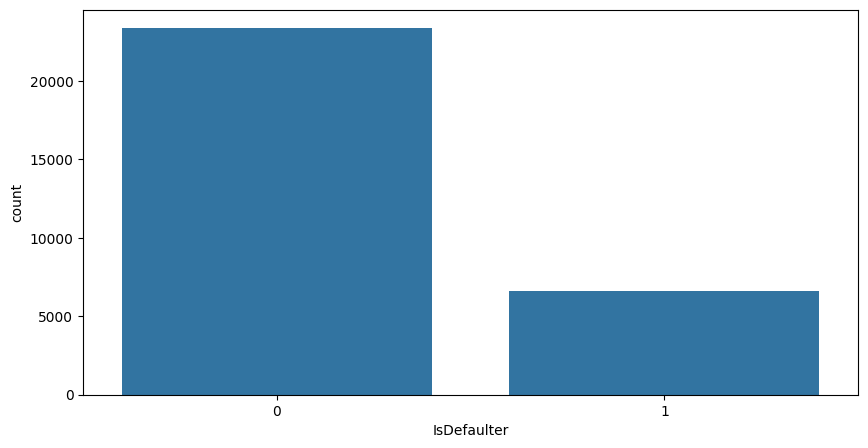

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [ ]:
df['IsDefaulter'].value_counts()

,count
IsDefaulter,
0,23364
1,6636


as we can see from above graph that both classes are not in proportion and we have imbalanced dataset.


## Independent Variable:

Categorical Features¶

We have few categorical features in our dataset. Let'Check how they are related with out target class.

SEX

1 - Male 2 - Female

In [ ]:
df['SEX'].value_counts()

,count
SEX,
2,18112
1,11888


Education

1 = graduate school; 2 = university; 3 = high school; 4 = others



In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [ ]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


Marriage

1 = married; 2 = single; 3 = others

In [ ]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


We have few values for 0, which are not determined . So I am adding them in Others category.

In [ ]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,377


## Plotting our categorical features

<Figure size 1000x500 with 0 Axes>

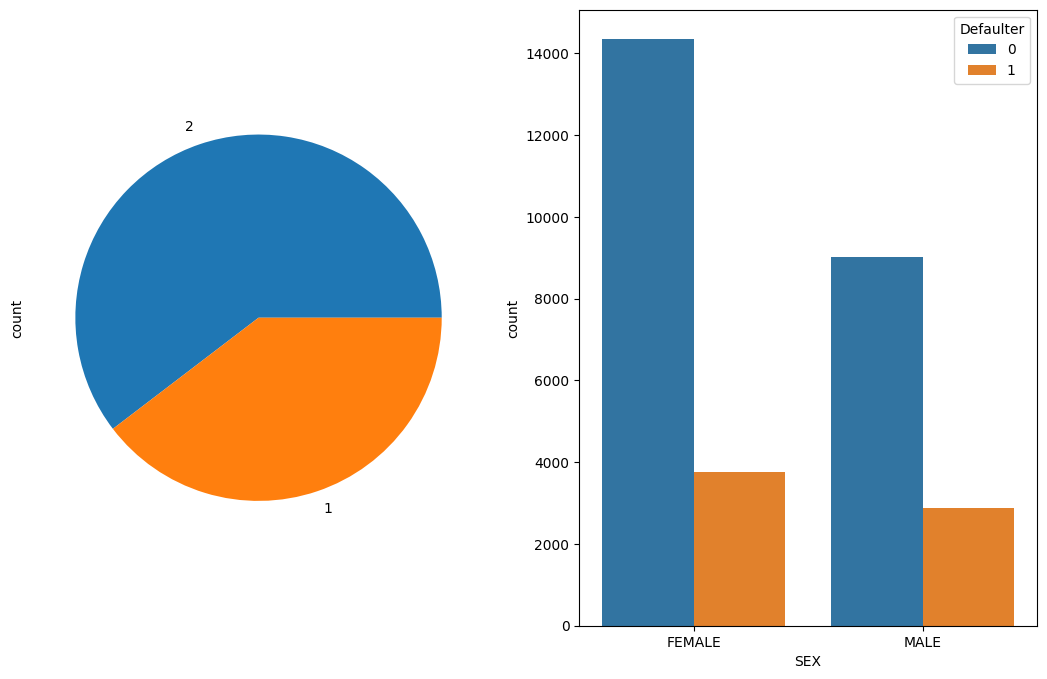

<Figure size 1000x500 with 0 Axes>

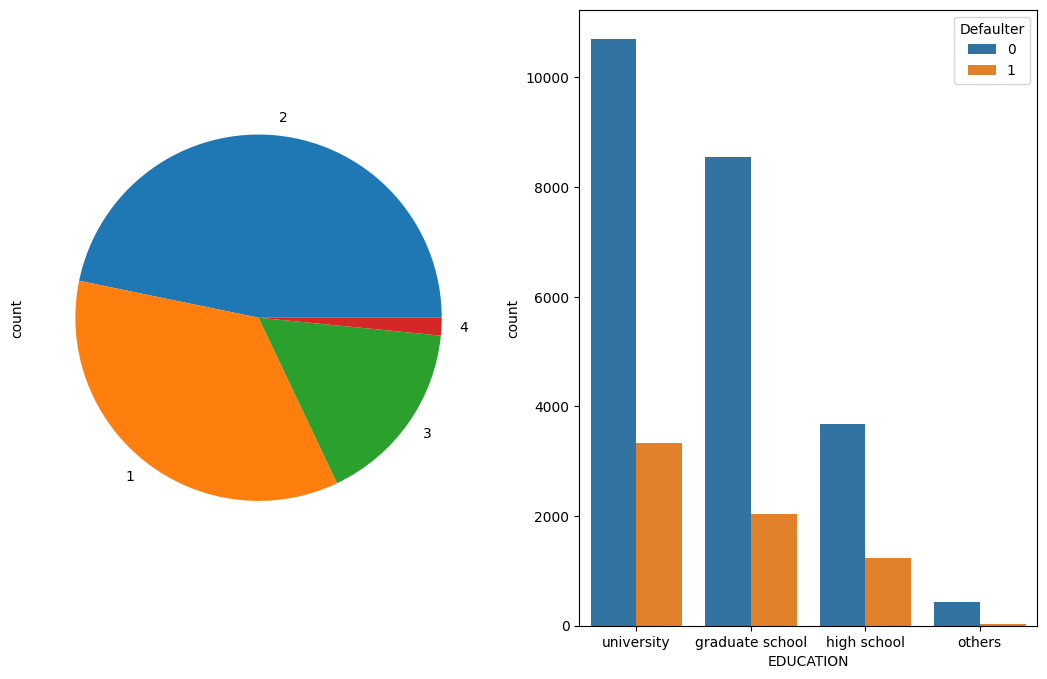

<Figure size 1000x500 with 0 Axes>

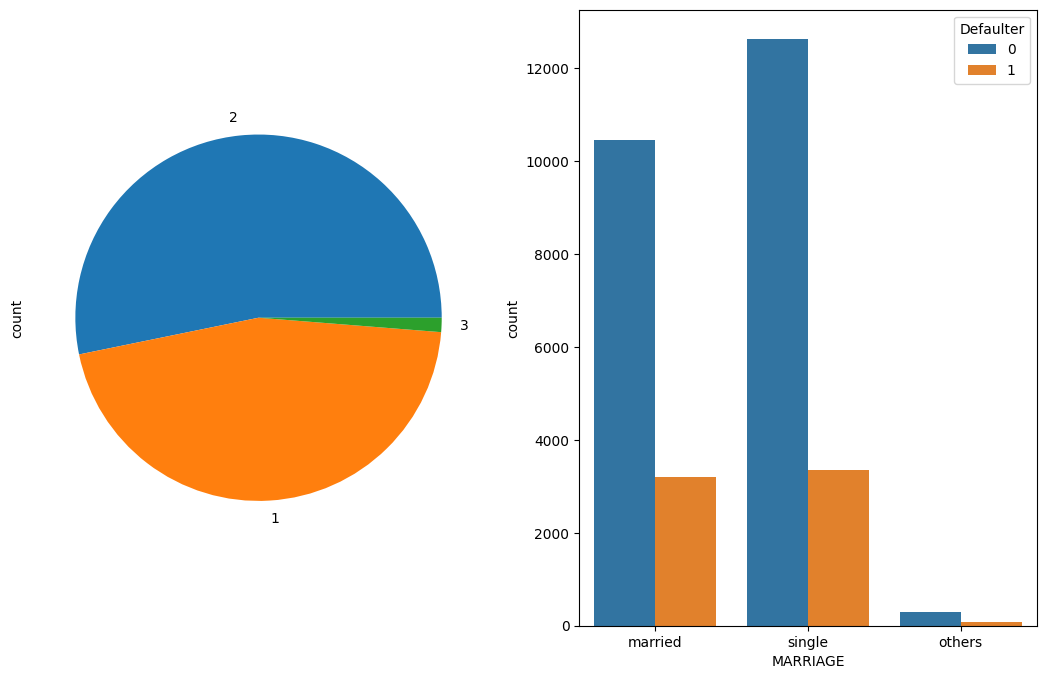

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']


df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)



for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

There are more females credit card holder,so no. of defaulter have high proportion of females. #No. of defaulters have a higher proportion of educated people (graduate school and university) #No. of defaulters have a higher proportion of Singles.

Limit Balance

In [ ]:
df['LIMIT_BAL'].max()

1000000.0

In [ ]:
df['LIMIT_BAL'].min()

10000.0

In [ ]:
df['LIMIT_BAL'].describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

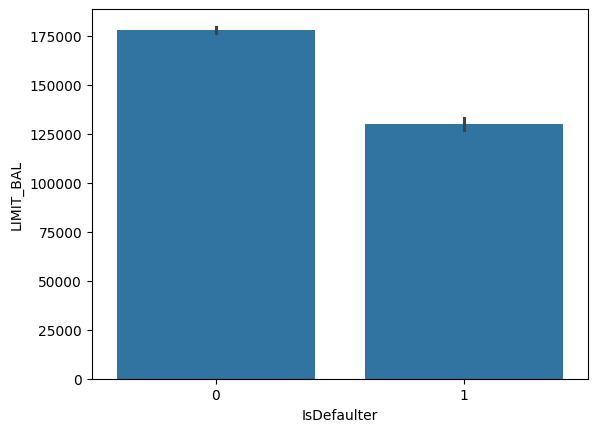

In [ ]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

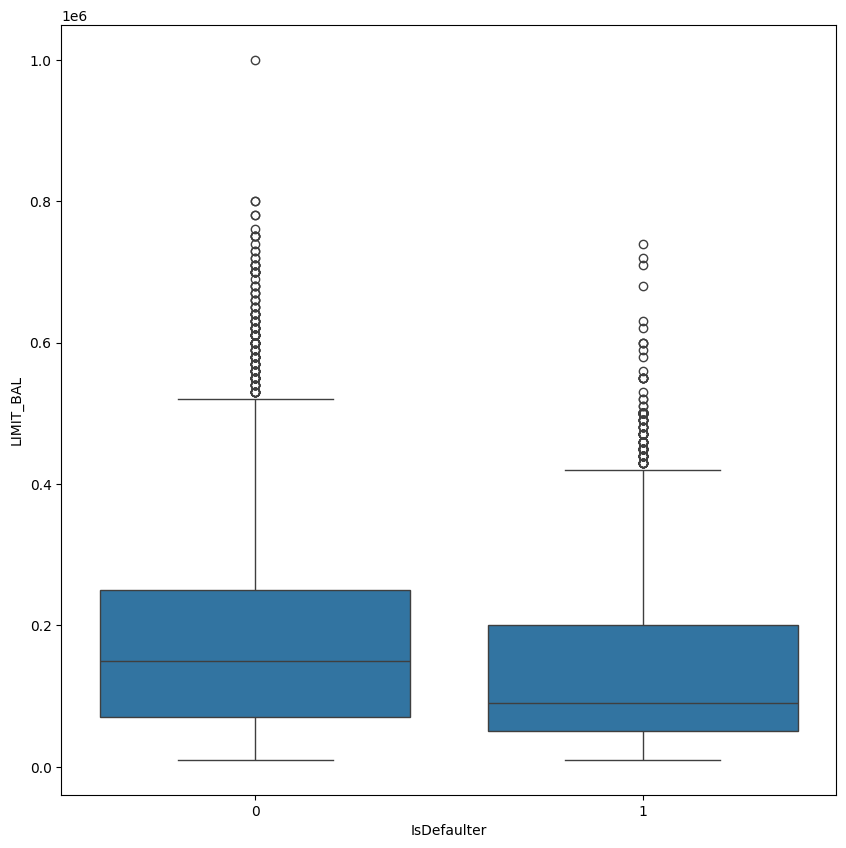

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

plt.savefig('output2.png')
plt.show()

In [ ]:
#renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


AGE

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [ ]:
df['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


In [ ]:
df['AGE']=df['AGE'].astype('int')

In [ ]:
df.groupby('IsDefaulter')['AGE'].mean()

,AGE
IsDefaulter,
0,35.417266
1,35.725738


In [ ]:
df = df.astype('int')

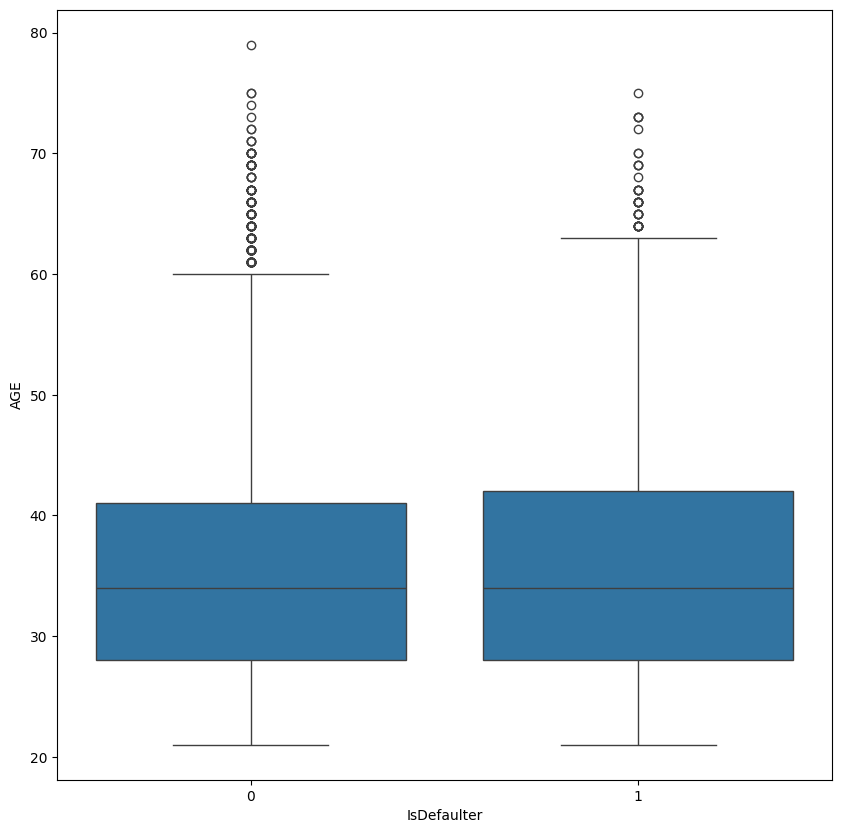

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

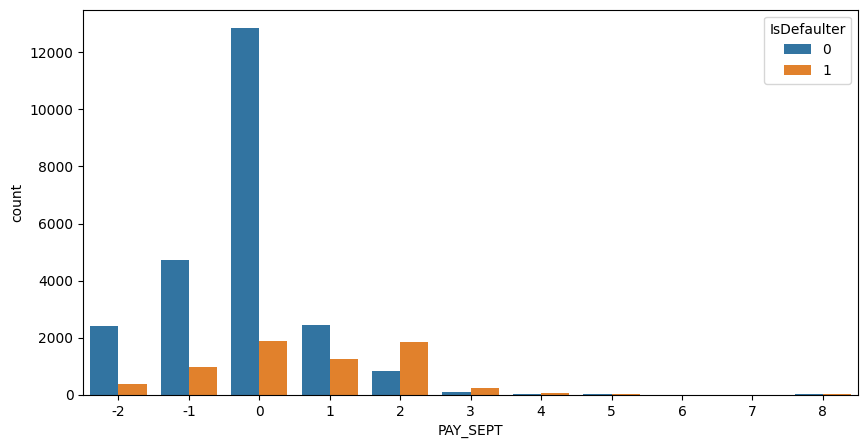

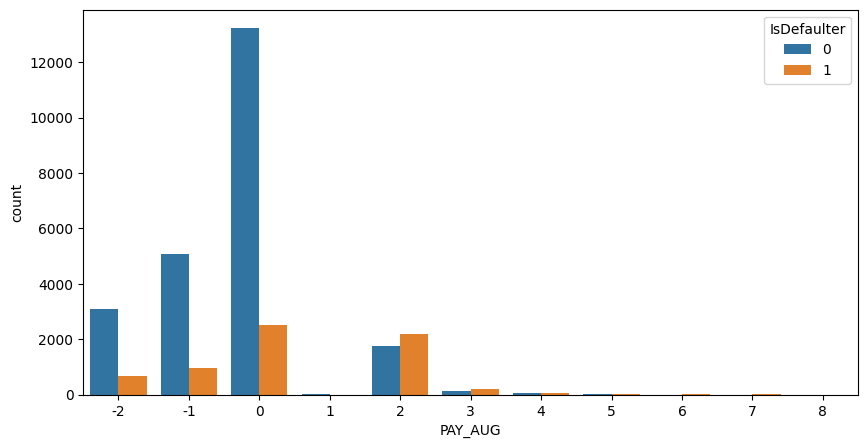

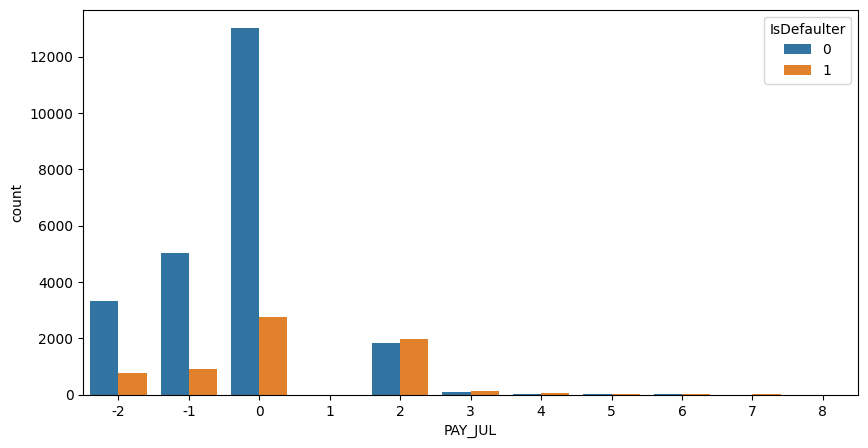

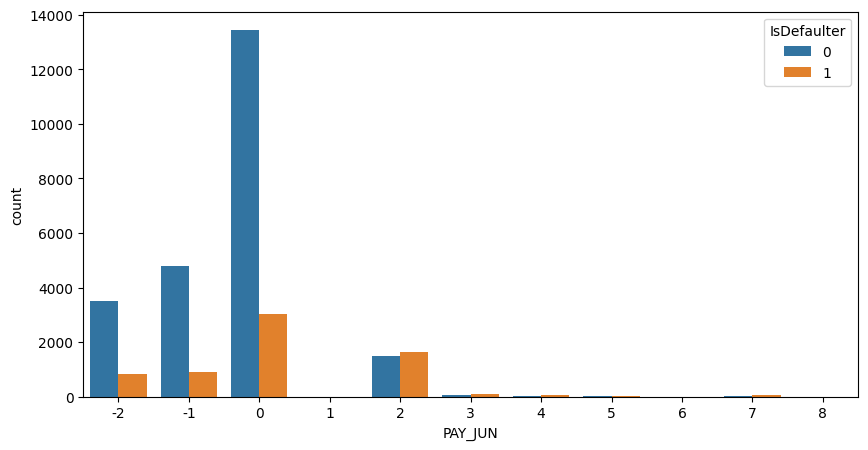

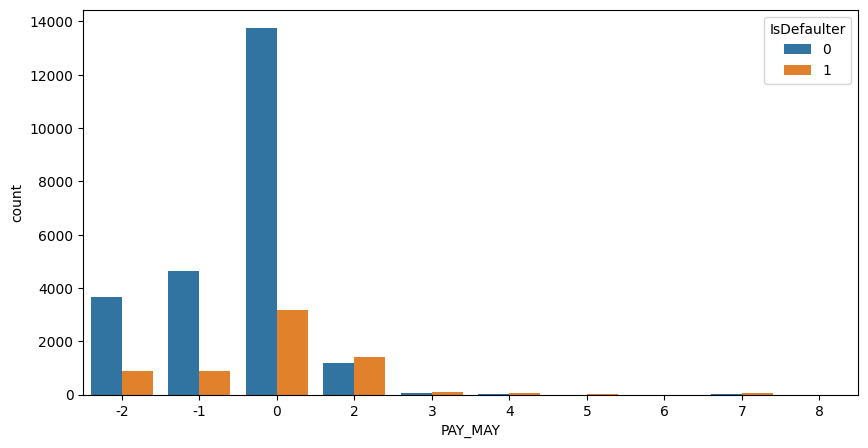

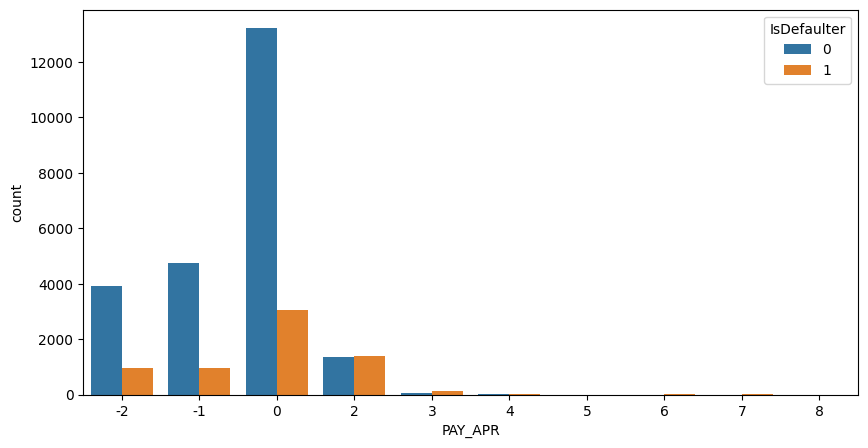

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

In [ ]:
df.shape

(30000, 26)

As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18284,70000,1,1,2,30,2,0,0,0,...,37561,38263,39059,1925,2000,1588,1437,1466,1537,1
46724,7621,90000,1,2,2,27,2,0,0,0,...,36609,36180,31983,3764,1575,1320,1257,1334,1314,1
46725,14854,290000,1,2,1,47,-1,-1,-1,-1,...,1718,1642,5108,1879,569,1726,1648,5130,4542,1
46726,1783,170822,1,2,1,46,0,0,0,0,...,99432,101609,111046,4381,3530,3739,3939,11369,328,1


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'IsDefaulter'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

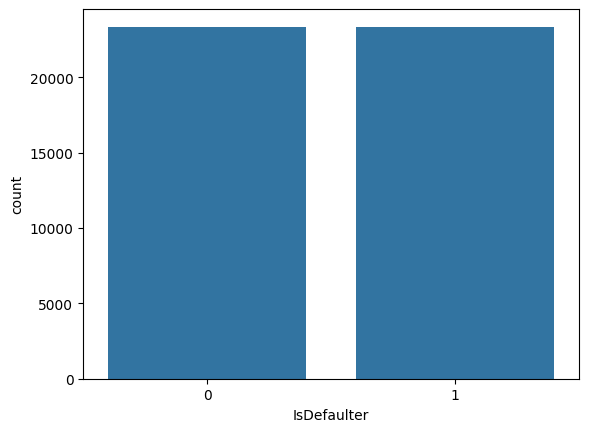

In [ ]:
sns.countplot(x='IsDefaulter', data=balance_df)

In [ ]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
13,14,70000,1,2,2,30,1,2,2,0,...,36137,36894,3200,0,3000,3000,1500,0,1,1
16,17,20000,1,1,2,24,0,0,2,2,...,17905,19104,3200,0,1500,0,1650,0,1,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18284,70000,1,1,2,30,2,0,0,0,...,38263,39059,1925,2000,1588,1437,1466,1537,1,1
46724,7621,90000,1,2,2,27,2,0,0,0,...,36180,31983,3764,1575,1320,1257,1334,1314,1,1
46725,14854,290000,1,2,1,47,-1,-1,-1,-1,...,1642,5108,1879,569,1726,1648,5130,4542,1,1
46726,1783,170822,1,2,1,46,0,0,0,0,...,101609,111046,4381,3530,3739,3939,11369,328,1,1


In [ ]:
df_fr = balance_df.copy()

In [ ]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [ ]:
df_fr.drop('ID',axis = 1, inplace = True)

In [ ]:
df_fr.to_csv('Final_df.csv')

In [ ]:
df_fr = pd.read_csv('./Final_df.csv')

In [ ]:
df_fr.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,2,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,3,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


## Implementing Logistic Regression

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.



In [ ]:
df_log_reg = df_fr.copy()

In [ ]:
# Separate features and target variable
X = df_log_reg.drop(['IsDefaulter'], axis=1)
y = df_log_reg['IsDefaulter']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21, stratify=y)

In [ ]:
# Select important features to avoid overfitting
X_train_dropped = X_train[['AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG','PAY_SEPT']]
X_test_dropped = X_test[[ 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG','PAY_SEPT']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dropped)
X_test_scaled = scaler.transform(X_test_dropped)

In [ ]:
# Create and train the Logistic Regression model with regularization
model = LogisticRegression(C=0.1, penalty='l2')
model.fit(X_train_scaled, y_train)


LogisticRegression(C=0.1)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"The accuracy on test data is: {accuracy:.2f}")
print(report)

The accuracy on test data is: 0.68
              precision    recall  f1-score   support

           0       0.65      0.80      0.71      7710
           1       0.74      0.57      0.64      7711

    accuracy                           0.68     15421
   macro avg       0.69      0.68      0.68     15421
weighted avg       0.69      0.68      0.68     15421



In [ ]:
# Calculate additional evaluation metrics
test_precision_score_lr = precision_score(y_test, y_pred)
test_recall_score_lr = recall_score(y_test, y_pred)
test_f1_score_lr = f1_score(y_test, y_pred)
test_roc_score_lr = roc_auc_score(y_test, y_pred)

print("The precision on test data is:", test_precision_score_lr)
print("The recall on test data is:", test_recall_score_lr)
print("The F1 score on test data is:", test_f1_score_lr)
print("The ROC AUC score on test data is:", test_roc_score_lr)


The precision on test data is: 0.7368955021981738
The recall on test data is: 0.5651666450525223
The F1 score on test data is: 0.6397064220183486
The ROC AUC score on test data is: 0.6816754107234078


In [64]:
import pickle

# Save the trained model as a .pkl file
with open('credit_default_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

# Download the saved model file to your local machine
from google.colab import files
files.download('credit_default_model.pkl')


Model saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Implementing SVM

In [55]:
# Create and train the SVM model with regularization
model_svm = SVC(C=1.0, kernel='linear', probability=True, random_state=21)
model_svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=21)

In [56]:
# Make predictions
y_pred_svm = model_svm.predict(X_test_scaled)

In [57]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print(f"The accuracy on test data is: {accuracy_svm:.2f}")
print(report_svm)


The accuracy on test data is: 0.68
              precision    recall  f1-score   support

           0       0.64      0.85      0.73      7710
           1       0.78      0.51      0.62      7711

    accuracy                           0.68     15421
   macro avg       0.71      0.68      0.67     15421
weighted avg       0.71      0.68      0.67     15421



In [58]:
# Calculate additional evaluation metrics
test_precision_score_svm = precision_score(y_test, y_pred_svm)
test_recall_score_svm = recall_score(y_test, y_pred_svm)
test_f1_score_svm = f1_score(y_test, y_pred_svm)
test_roc_score_svm = roc_auc_score(y_test, y_pred_svm)

In [59]:
print("The precision on test data is:", test_precision_score_svm)
print("The recall on test data is:", test_recall_score_svm)
print("The F1 score on test data is:", test_f1_score_svm)
print("The ROC AUC score on test data is:", test_roc_score_svm)

The precision on test data is: 0.775146771037182
The recall on test data is: 0.5136817533393853
The F1 score on test data is: 0.6178925200842368
The ROC AUC score on test data is: 0.6823272579926498
